 Mr. Linh's data
 Jul, 2023

In [75]:
import pandas as pd, numpy as np, os, pickle, matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times, restricted_mean_survival_time
from lifelines.statistics import logrank_test
from lifelines.plotting import add_at_risk_counts

dt = pd.read_excel('./Hiệu_quả_điều_trị_đích_bệnh_nhân_có_đột_biến_kép_gen_EGFR_-_all_versions_-_labels_-_2023-07-23-04-58-09.xlsx')

In [76]:
dt.rename({'10. Ngày nhập viện ': 'ngaynhap', 
           'Thời gian sống thêm không bệnh tiến triển ': 'ngay_fps', 
           'Thời gian sống thêm toàn bộ': 'ngay_os', 
           'Kết cục OS (censor)': 'tv'}, inplace=True, axis=1)

Text(0, 0.5, 'OS (months)')

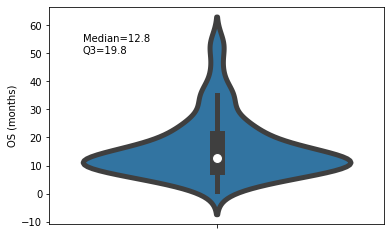

In [77]:
ngayvars = ['ngaynhap', 'ngay_fps', 'ngay_os']
dt.loc[:, ngayvars].dtypes
dt['os'] = (dt['ngay_os'].dt.date - dt['ngaynhap'].dt.date)/np.timedelta64(1, 'M')
dt['os'].describe()
import seaborn as sns
sns.violinplot(data=dt, y='os', linewidth=5)
plt.text(-0.4, 50, 'Median=12.8\nQ3=19.8')
plt.ylabel('OS (months)')

Text(0, 0.5, 'OS (months)')

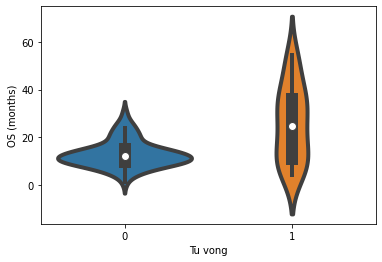

In [78]:
sns.violinplot(data=dt, x='tv', y='os', linewidth=4)
plt.xlabel('Tu vong')
plt.ylabel('OS (months)')

 Take value acording to quartile median and round up to 12 months

In [79]:
sel = dt['os']>=24
sel2 = dt['os']>=18
n = sel.sum()
p = round(sel.sum()*100/dt.shape[0], 1)
n1 = sel2.sum()
p1 = round(sel2.sum()*100/dt.shape[0], 1)
print(f'There were {n} ({p}%) patient in the study was completed 2 years follow up')
print(f'There were {n1} ({p1}%) patient in the study was completed 1.5 years follow up')

There were 19 (17.8%) patient in the study was completed 2 years follow up
There were 31 (29.0%) patient in the study was completed 1.5 years follow up


<Axes: xlabel='timeline'>

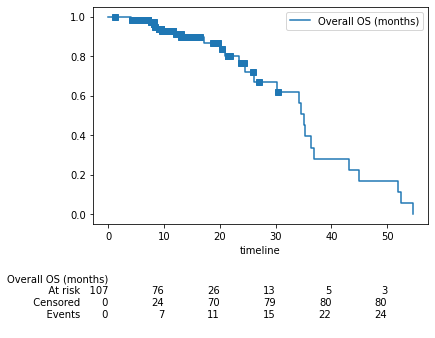

In [80]:
f1 = KaplanMeierFitter()
ax = plt.subplot(111)
f1.fit(dt['os'], event_observed=dt['tv'], label='Overall OS (months)')
f1.plot_survival_function(ax=ax, ci_show=False, show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
add_at_risk_counts(f1, ax=ax)

In [81]:
ntv = (dt['tv']==1).sum()
ptv = round(ntv/dt.shape[0]*100, 1)
print(f'{ntv} ({ptv}%) event observed')

27 (25.2%) event observed
